In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.metrics import (adjusted_mutual_info_score, adjusted_rand_score,
                             classification_report)
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from transform_data import get_train_test_ds

random_state = 42
range_n_clusters = range(2, 61)
dataset_name = 'income'
dataset_dir = 'data/adult.data'

# PCA

In [39]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds(dataset_name, dataset_dir, random_state)
X_train.shape, X_test.shape

((26048, 58), (6513, 58))

In [3]:
pca = PCA(n_components=40, random_state=random_state)
pipe = Pipeline([
  ('scaler', StandardScaler()), 
  ('pca', pca),
])

X = pipe.fit_transform(X)

## GMM

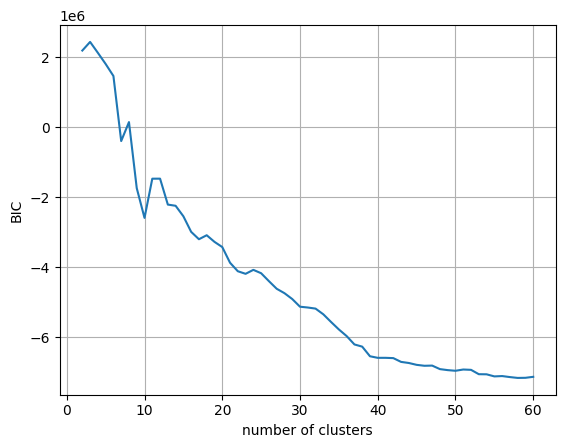

In [4]:
bic_list = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    bic_list.append(clusterer.bic(X))

plt.plot(range_n_clusters, bic_list, label='bic')
plt.xlabel("number of clusters")
plt.ylabel("BIC")
plt.grid()
plt.show()

In [5]:
clusterer = GaussianMixture(n_components=39, covariance_type='full', random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.07140566436158137
ari: 0.010143122050479255
f1_score: 0.5964490475309784


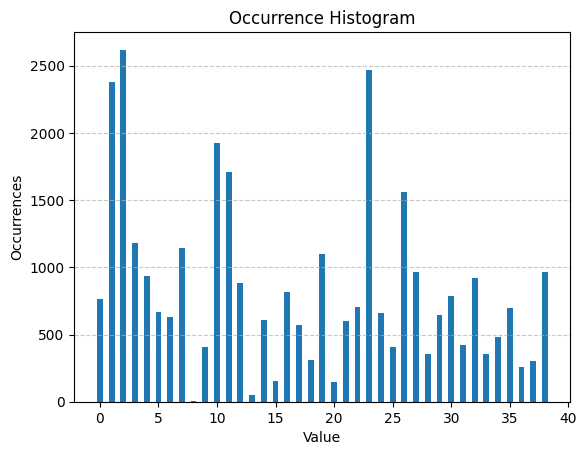

In [6]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

## KMeans

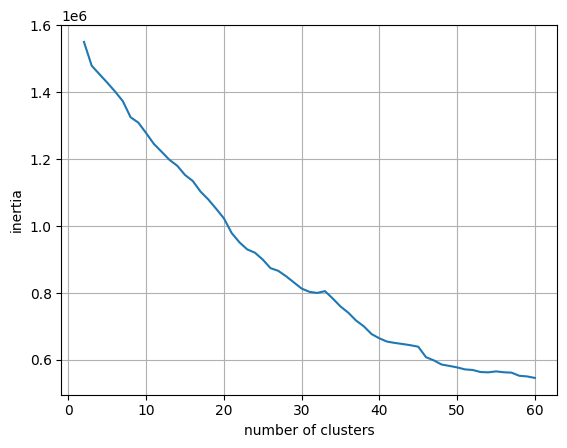

In [7]:
inertia_list = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    inertia_list.append(clusterer.inertia_)

plt.plot(range_n_clusters, inertia_list, label='inertia')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [8]:
clusterer = KMeans(n_clusters=32, random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.07644628393458626
ari: 0.014264922232152352
f1_score: 0.604570603800818


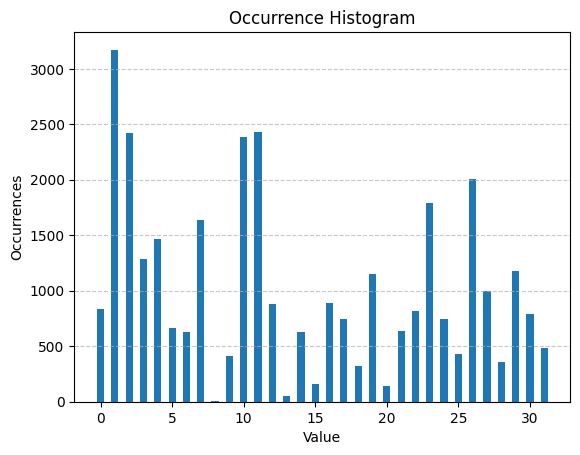

In [9]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

# ICA

In [26]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds(dataset_name, dataset_dir, random_state)
X_train.shape, X_test.shape

((26048, 58), (6513, 58))

In [27]:
ica = FastICA(n_components=39, max_iter=500, random_state=random_state)
pipe = Pipeline([
  ('scaler', StandardScaler()), 
  ('ica', ica),
])

X = pipe.fit_transform(X)

## GMM

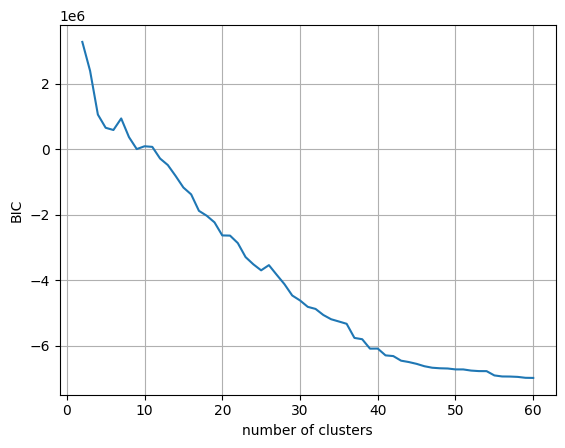

In [12]:
bic_list = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    bic_list.append(clusterer.bic(X))

plt.plot(range_n_clusters, bic_list, label='bic')
plt.xlabel("number of clusters")
plt.ylabel("BIC")
plt.grid()
plt.show()

In [28]:
clusterer = GaussianMixture(n_components=41, covariance_type='full', random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.05365791933197404
ari: 0.006886279652333053
f1_score: 0.5430042271795087


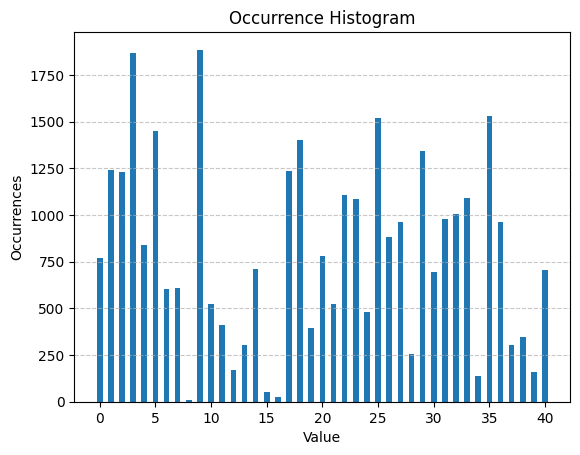

In [29]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

## KMeans

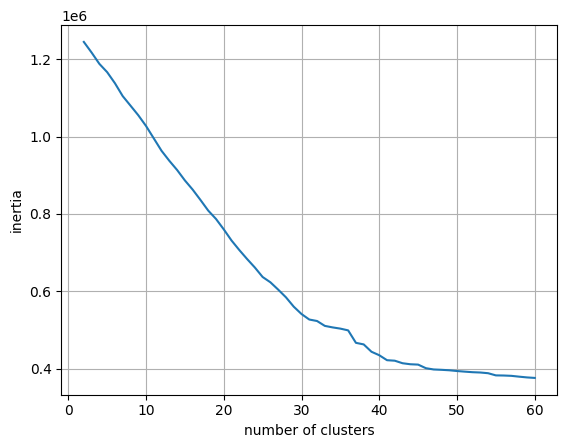

In [15]:
inertia_list = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    inertia_list.append(clusterer.inertia_)

plt.plot(range_n_clusters, inertia_list, label='inertia')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [30]:
clusterer = KMeans(n_clusters=37, random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.04919616576576557
ari: 0.005316476420976736
f1_score: 0.5272101618590425


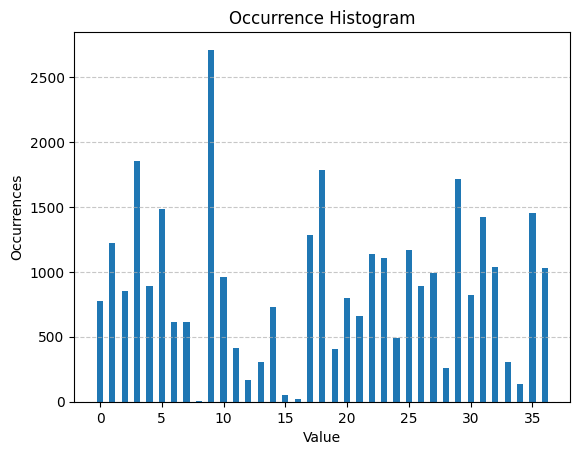

In [31]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

# Random projection

In [32]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds(dataset_name, dataset_dir, random_state)
X_train.shape, X_test.shape

((26048, 58), (6513, 58))

In [33]:
rca = GaussianRandomProjection(n_components=33, random_state=random_state)
pipe = Pipeline([
  ('scaler', StandardScaler()), 
  ('rca', rca),
])

X = pipe.fit_transform(X)

## GMM

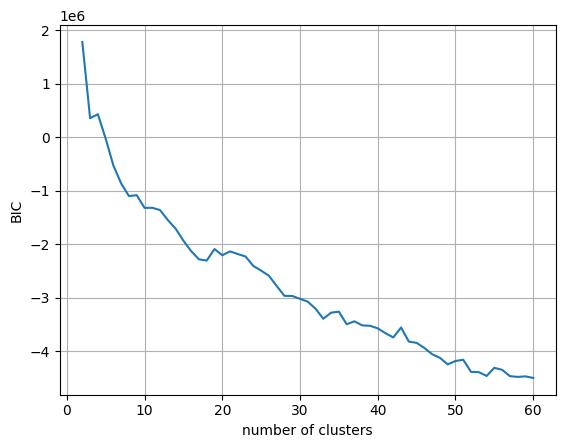

In [20]:
bic_list = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    bic_list.append(clusterer.bic(X))

plt.plot(range_n_clusters, bic_list, label='bic')
plt.xlabel("number of clusters")
plt.ylabel("BIC")
plt.grid()
plt.show()

In [34]:
clusterer = GaussianMixture(n_components=19, covariance_type='full', random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.0788134864595553
ari: 0.04375049850436613
f1_score: 0.5555645553215617


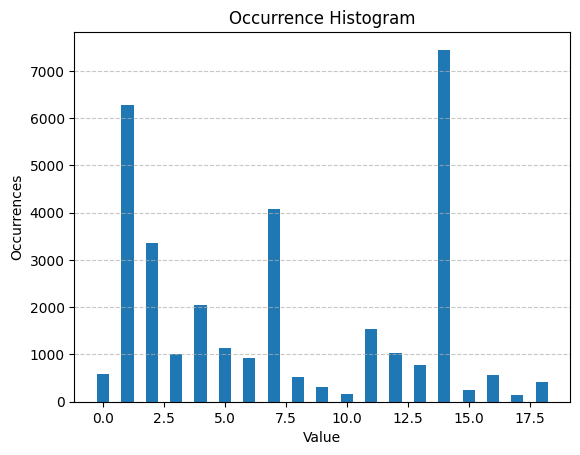

In [35]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

## KMeans

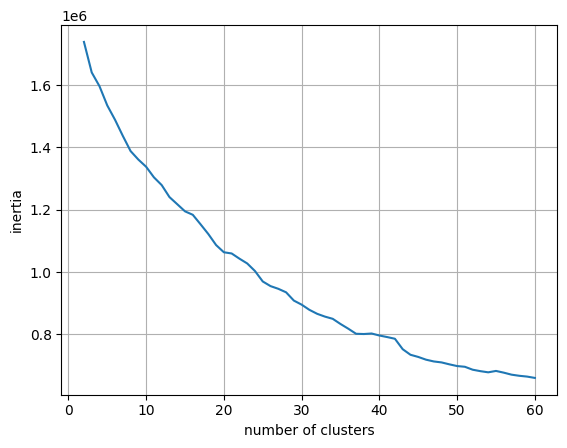

In [23]:
inertia_list = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    inertia_list.append(clusterer.inertia_)

plt.plot(range_n_clusters, inertia_list, label='inertia')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [36]:
clusterer = KMeans(n_clusters=37, random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.07378264992266972
ari: 0.012882655184787782
f1_score: 0.5678060907395898


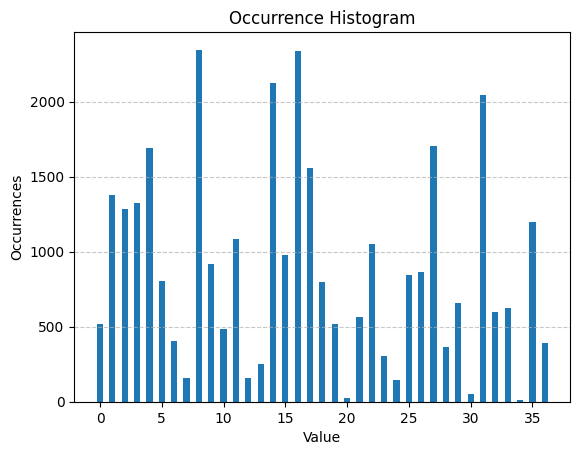

In [37]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

# t-SNE

In [33]:
X, X_train, X_test, y, y_train, y_test = get_train_test_ds(dataset_name, dataset_dir, random_state)
X_train.shape, X_test.shape

((26048, 58), (6513, 58))

In [34]:
full_scaler = StandardScaler()
X = full_scaler.fit_transform(X)

tsne = TSNE(n_components=3, n_jobs=-1, random_state=random_state)
X = tsne.fit_transform(X)

## GMM

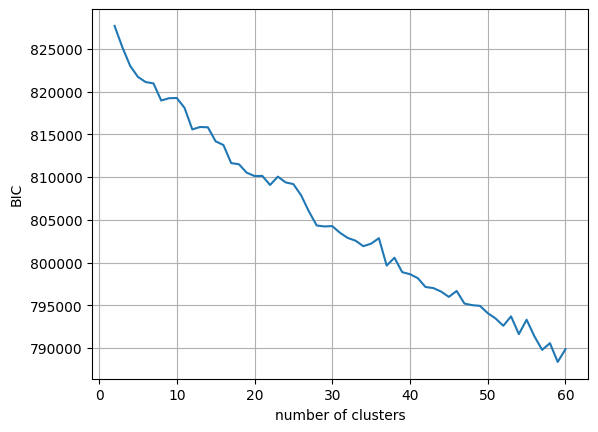

In [35]:
bic_list = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    bic_list.append(clusterer.bic(X))

plt.plot(range_n_clusters, bic_list, label='bic')
plt.xlabel("number of clusters")
plt.ylabel("BIC")
plt.grid()
plt.show()

In [36]:
clusterer = GaussianMixture(n_components=57, covariance_type='full', random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.056146557945755515
ari: 0.006387320555642505
f1_score: 0.5591511005875647


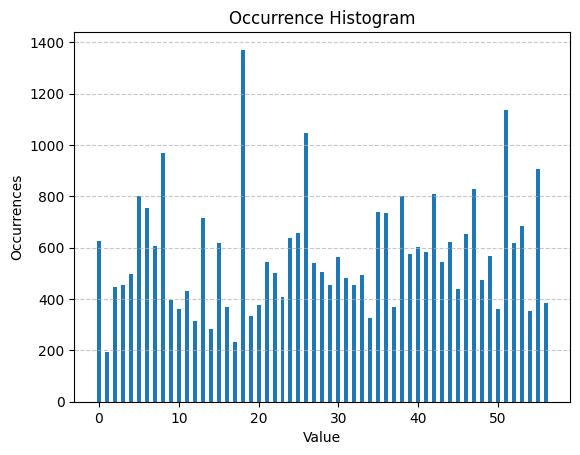

In [37]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()

## KMeans

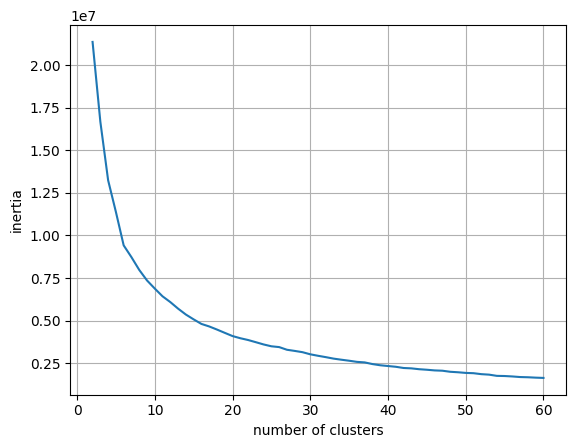

In [38]:
inertia_list = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels_train = clusterer.fit_predict(X)

    inertia_list.append(clusterer.inertia_)

plt.plot(range_n_clusters, inertia_list, label='inertia')
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [41]:
clusterer = KMeans(n_clusters=16, random_state=random_state)
cluster_labels = clusterer.fit_predict(X)

y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
pos_ratio = y_train.value_counts()[1]/len(y_train)

class_distribution = y_df.groupby('y_pred')['y'].value_counts().unstack(fill_value=0)
class_distribution['ratio'] = class_distribution[1]/(class_distribution[0]+class_distribution[1])
class_distribution['fit'] = np.where(class_distribution['ratio']>=pos_ratio, 1, 0)

# test scores
y_df = pd.concat([y], axis=1)
y_df['y_pred'] = cluster_labels
y_df['y_pred'] = np.where(y_df['y_pred'].isin(class_distribution.query('fit==1').index), 1, 0)

ami = adjusted_mutual_info_score(y, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)
f1_score = classification_report(y_df['y'], y_df['y_pred'], output_dict=True)['1']['f1-score']

print(f"ami: {ami}")
print(f"ari: {ari}")
print(f"f1_score: {f1_score}")

ami: 0.06377774204131186
ari: 0.015381331246235783
f1_score: 0.5659253375694996


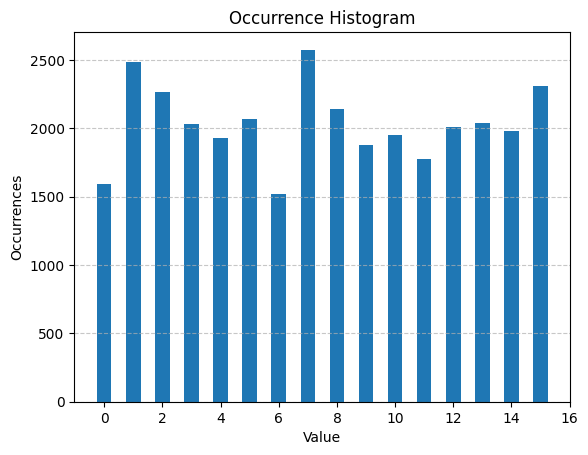

In [42]:
hist, bins = np.histogram(cluster_labels, bins=np.arange(cluster_labels.min(), cluster_labels.max() + 2))
plt.bar(bins[:-1], hist, align='center', width=0.5)
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.title('Occurrence Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.show()